In [1]:
#Hi everyone today we are doing feature engineering project to apply some of feature engineering tech such as 
#1- Missing Value Imputation
#2- Encoding categorical columuns
#3- Finding the outlier values
#4- Standarzation values

In [2]:
# import the libraries
import pandas as pd
import numpy as np

In [3]:
# read the data using read_csv fun
Data = pd.read_csv("c:/Users/nxt-1/Downloads/Video Games Sales.csv")

In [4]:
# this fun are to display the max number of rows and columns and it is imprtant data to view the full data
# note: do not using this fun to diplay the fully data like example. code (data) then run. this will take high amount of cpu and ram
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# display the data
Data.head()

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


In [6]:
Data["Year"].unique()

array([2006., 1985., 2008., 2009., 1989., 1984., 2005., 1999., 2007.,
       2004., 1990., 2010., 1988., 2002., 2001., 2011., 1998., 1996.,
       2012., 2000., 1992., 1997., 1993., 1994., 2003., 1986.,   nan,
       1995., 1991., 1987., 1983.])

In [7]:
# using some EDA to represent the sports genrs have the highiest value games dataset
Data["Genre"].value_counts()

Genre
Sports          308
Action          275
Shooter         206
Platform        188
Racing          186
Role-Playing    173
Misc            159
Fighting        126
Adventure       110
Simulation       92
Puzzle           44
Strategy         40
Name: count, dtype: int64

In [8]:
# 1- Missing Value Imputation
# check if there any null value by column name and percent for each column:
for i in range(len(Data.isnull().sum().sort_values(ascending=False).index)):
    print("the column name :",Data.isnull().sum().sort_values(ascending=False).index[i],"have null value by percent: ",
    Data.isnull().sum().sort_values(ascending=False).astype("int").values[i]/len(Data) * 100)
# so we have two columns have null value the "Year" and "Publisher" columns. how will to deal with?
# for the "Year" column we will take the mean value or the AVG and for "Publisher" column we will take the most frequents value or the mode         

the column name : Year have null value by percent:  1.5207131620346093
the column name : Publisher have null value by percent:  0.1048767697954903
the column name : index have null value by percent:  0.0
the column name : Rank have null value by percent:  0.0
the column name : Game Title have null value by percent:  0.0
the column name : Platform have null value by percent:  0.0
the column name : Genre have null value by percent:  0.0
the column name : North America have null value by percent:  0.0
the column name : Europe have null value by percent:  0.0
the column name : Japan have null value by percent:  0.0
the column name : Rest of World have null value by percent:  0.0
the column name : Global have null value by percent:  0.0
the column name : Review have null value by percent:  0.0


In [9]:
# 1- "Year" column
Data["Year"].fillna(Data["Year"].mean(),inplace=True)
# 2- "Publisher" column
Data["Publisher"].fillna(Data["Publisher"].value_counts().idxmax(),inplace=True)

In [10]:
#check where if there any null value after apply fillna fun
Data.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [12]:
#2- Encoding categorical columun
# first we are tring to import LabelEncoder libarary
# then select the category columns to convert into num columns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [13]:
# transform each categorical columns into numrical columns using LabelEncoder and fit_transform fun
Data["Game Title_label"] = lb.fit_transform(Data["Game Title"])
Data["Platform_label"] = lb.fit_transform(Data["Platform"])
Data["Genre_label"] = lb.fit_transform(Data["Genre"])
Data["Publisher_label"] = lb.fit_transform(Data["Publisher"])

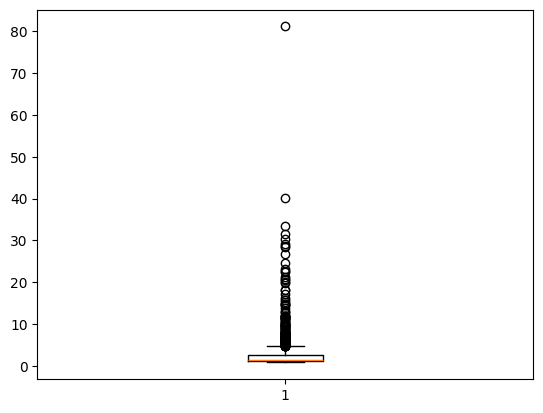

In [14]:
#3- Finding the outlier values. we will use viz tech method to determan if there any outlier value fro each columns in the dataset
# first import the viz libabry such as matplotlib then using fun boxplot to viz the data.
import matplotlib.pyplot as plt
plt.boxplot(Data["Global"])
plt.show()
# after seeing the column Global. i see the highiest value 81. and neariest value from 81 are 44. so i Think 81 are outlier value, so we should drop it.
Data.drop(index= Data[Data["Global"] >= 81].index,inplace=True)

In [15]:
#4- Standarzation value
# here we trying to scaling the range for the dataset using StandardScaler libarary
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler() 

In [16]:
# extracting the nassary columns to put on the preprocessing fun 
new_col = ["Game Title_label","Platform_label","Genre_label","Publisher_label","Year","North America","Europe","Japan","Rest of World","Global","Review"]
new_data = Data[new_col]

In [18]:
# converting the year column for object to int
new_data["Year"] = new_data["Year"].astype("int16")

C:\Users\nxt-1\AppData\Local\Temp\ipykernel_15868\3853400178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Year"] = new_data["Year"].astype("int16")


In [19]:
# fit and transform tech to preprocssing the dataset.
new_data_after_preprocssing = Scale.fit_transform(new_data)